In [139]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
df  = pd.read_csv('..\Data\CSV\cleaned_flight_data.csv')


<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
C:\Users\zilan\AppData\Local\Temp\ipykernel_14596\3683215384.py:5: SyntaxWarning: invalid escape sequence '\D'
  df  = pd.read_csv('..\Data\CSV\cleaned_flight_data.csv')


In [140]:
df

,tbl,Year,quarter,departure_city_id,arrival_city_id,departure_city,arrival_city,departure_airport_id,arrival_airport_id,departure_airport,...,large_ms,fare_lg,carrier_low,lf_ms,fare_low,tbl1apk,departure_latitude,departure_longitude,arrival_latitude,arrival_longitude
0,Table 1a,2010,1,34614,33195,"Salt Lake City, UT","Tampa, FL (Metropolitan Area)",14869,15304,SLC,...,0.3800,247.69,US Airways Group Inc.,0.2000,166.99,201011486915304SLCTPA,40.758478,-111.888142,37.860600,-78.804199
1,Table 1a,1998,4,30189,31703,"Colorado Springs, CO","New York City, NY (Metropolitan Area)",11109,12197,COS,...,0.7300,292.60,Northwest Airlines Inc.,0.2400,248.27,199841110912197COSHPN,38.835224,-104.819798,40.123164,-75.333718
2,Table 1a,1998,4,30198,30852,"Pittsburgh, PA","Washington, DC (Metropolitan Area)",14122,10821,PIT,...,0.9300,245.70,Continental Airlines Inc.,0.0300,71.30,199841412210821PITBWI,40.442169,-79.994945,38.892062,-77.019912
3,Table 1a,2009,3,32211,32575,"Las Vegas, NV","Los Angeles, CA (Metropolitan Area)",12889,14908,LAS,...,0.5800,118.28,US Airways Group Inc.,0.4100,102.75,200931288914908LASSNA,36.169202,-115.140597,34.052238,-118.243344
4,Table 1a,1993,4,30255,30852,"Huntsville, AL","Washington, DC (Metropolitan Area)",12217,12264,HSV,...,0.4800,275.50,United Air Lines Inc.,0.2500,197.69,199341221712264HSVIAD,34.729538,-86.585283,38.892062,-77.019912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205184,Table1a,2020,2,35412,33195,"Knoxville, TN","Tampa, FL (Metropolitan Area)",15412,15304,TYS,...,0.9014,197.87,American Airlines Inc.,0.9014,197.87,202021541215304TYSTPA,35.962631,-83.916677,37.860600,-78.804199
205185,Table1a,2020,2,31834,32575,"Fayetteville, AR","Los Angeles, CA (Metropolitan Area)",15919,10800,XNA,...,1.0000,252.00,American Airlines Inc.,1.0000,252.00,202021591910800XNABUR,36.061928,-94.160583,34.052238,-118.243344
205186,Table1a,2020,2,31834,32575,"Fayetteville, AR","Los Angeles, CA (Metropolitan Area)",15919,12892,XNA,...,0.5610,90.05,Allegiant Air,0.5610,90.05,202021591912892XNALAX,36.061928,-94.160583,34.052238,-118.243344
205187,Table1a,2020,2,31834,32575,"Fayetteville, AR","Los Angeles, CA (Metropolitan Area)",15919,13891,XNA,...,0.9683,191.31,American Airlines Inc.,0.9683,191.31,202021591913891XNAONT,36.061928,-94.160583,34.052238,-118.243344


In [141]:
df.columns

Index(['tbl', 'Year', 'quarter', 'departure_city_id', 'arrival_city_id',
       'departure_city', 'arrival_city', 'departure_airport_id',
       'arrival_airport_id', 'departure_airport', 'arrival_airport', 'nsmiles',
       'passengers', 'fare', 'carrier_lg', 'large_ms', 'fare_lg',
       'carrier_low', 'lf_ms', 'fare_low', 'tbl1apk', 'departure_latitude',
       'departure_longitude', 'arrival_latitude', 'arrival_longitude'],
      dtype='object')

In [142]:

# Calculate total number of flights
total_flights = len(df)

# Print the result
print(f"Total number of flights: {total_flights}")


Total number of flights: 205189


In [143]:
departure_airport = df['departure_airport'].unique()
print(len(departure_airport))

178


In [144]:
departure_city = df['departure_city'].unique()
print(len(departure_city))

136


In [145]:
Top_carrier_low = df['departure_city'].value_counts().head(10)
Top_carrier_low

departure_city
Los Angeles, CA (Metropolitan Area)      21527
New York City, NY (Metropolitan Area)    19718
Boston, MA (Metropolitan Area)           19674
Chicago, IL                              15546
Dallas/Fort Worth, TX                    12142
Houston, TX                              11317
Cleveland, OH (Metropolitan Area)         7697
Miami, FL (Metropolitan Area)             6746
Atlanta, GA (Metropolitan Area)           3516
Detroit, MI                               3390
Name: count, dtype: int64

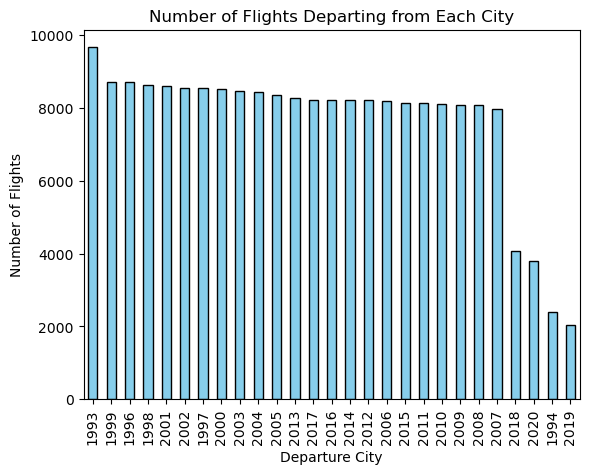

<Figure size 640x480 with 0 Axes>

In [146]:

# Counting occurrences of each unique value in the 'departure_city' column
count = df['Year'].value_counts()

# Plotting the bar chart
count.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('Number of Flights Departing from Each City')
plt.xlabel('Departure City')
plt.ylabel('Number of Flights')

# Displaying the chart
plt.show()

# Save the plot as a .png file
plt.savefig('../Data/Images/Number_of_Flights_Departing_from_Each_City.png')

In [147]:
arrival_airport =df['arrival_airport'].unique()
print(len(arrival_airport))

163


In [148]:
arrival_city = df['arrival_city'].unique()
print(len(arrival_city))

121


In [149]:
Top_arrival_city = df['arrival_city'].value_counts().head(10)
Top_arrival_city

arrival_city
New York City, NY (Metropolitan Area)    31247
Washington, DC (Metropolitan Area)       26680
San Francisco, CA (Metropolitan Area)    18625
Los Angeles, CA (Metropolitan Area)      17555
Tampa, FL (Metropolitan Area)             7352
Miami, FL (Metropolitan Area)             7238
Houston, TX                               5321
Norfolk, VA (Metropolitan Area)           4686
Phoenix, AZ                               4158
Dallas/Fort Worth, TX                     3443
Name: count, dtype: int64

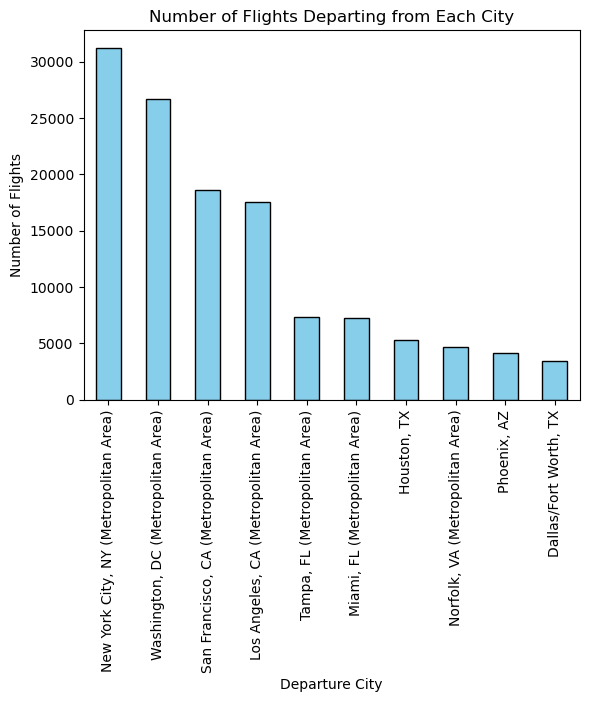

<Figure size 640x480 with 0 Axes>

In [150]:

# Plotting the bar chart
Top_arrival_city.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding labels and title
plt.title('Number of Flights Departing from Each City')
plt.xlabel('Departure City')
plt.ylabel('Number of Flights')

# Displaying the chart
plt.show()

# Save the plot as a .png file
plt.savefig('../Data/Images/Number_of_Flights_Departing_from_Each_City_Top_10.png')

In [151]:
bottom_arrival_city = df['arrival_city'].value_counts().tail(5)
bottom_arrival_city

arrival_city
Punta Gorda, FL    2
Sanford, FL        1
Huntsville, AL     1
Rockford, IL       1
Fort Wayne, IN     1
Name: count, dtype: int64

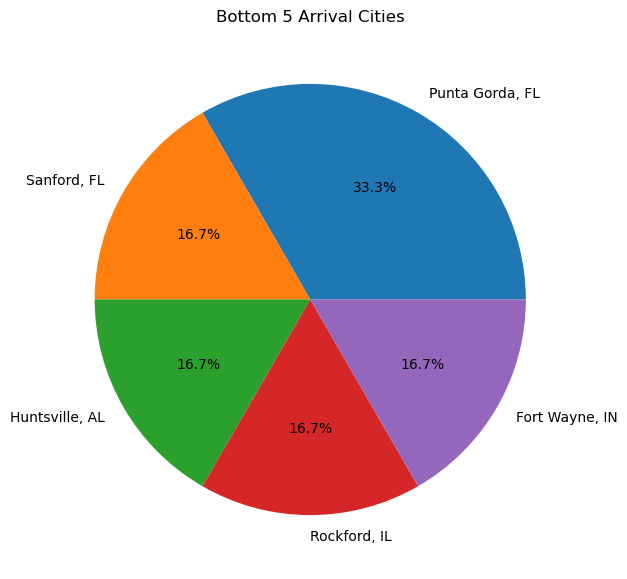

<Figure size 640x480 with 0 Axes>

In [152]:

# Bottom 5 arrival cities
bottom_arrival_city = df['arrival_city'].value_counts().tail(5)

# Create pie chart
bottom_arrival_city.plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7))

# Show the plot
plt.title('Bottom 5 Arrival Cities')
plt.ylabel('')  # Hide the y-label
plt.show()

# Save the plot as a .png file
plt.savefig('../Data/Images/Bottom_5_Arrival_Cities.png')

In [153]:
Top_carrier_low = df['carrier_low'].value_counts().head(10)
Top_carrier_low

carrier_low
Southwest Airlines Co.         40663
American Airlines Inc.         28446
Delta Air Lines Inc.           27748
US Airways Group Inc.          24811
United Air Lines Inc.          17141
Continental Airlines Inc.      15936
Northwest Airlines Inc.         9728
AirTran Airways Corporation     7544
America West Airlines Inc.      6973
JetBlue Airways                 4922
Name: count, dtype: int64

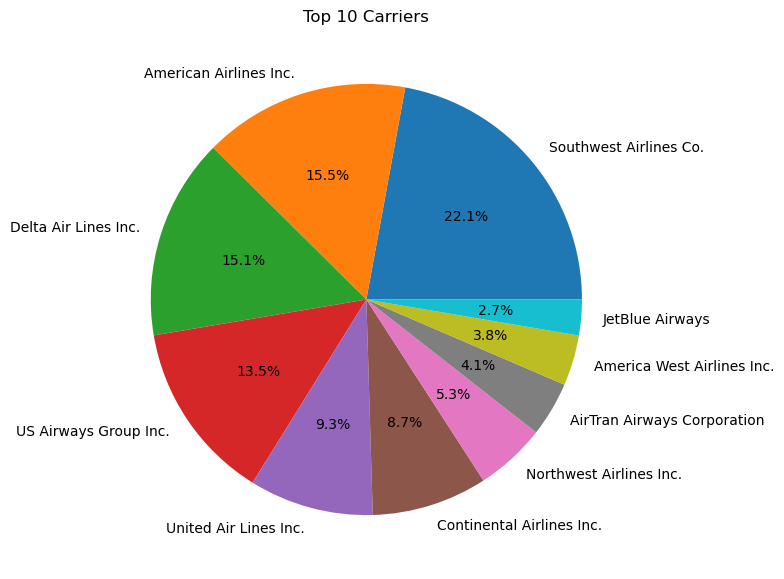

<Figure size 640x480 with 0 Axes>

In [154]:

# Top 10 carriers (most frequent)
Top_carrier_low = df['carrier_low'].value_counts().head(10)

# Create pie chart
Top_carrier_low.plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7))

# Show the plot
plt.title('Top 10 Carriers')
plt.ylabel('')  # Hide the y-label
plt.show()

# Save the plot as a .png file
plt.savefig('../Data/Images/Top_10_Carriers.png')

In [155]:

# Sort the DataFrame by the 'fare_low' column in ascending order and get the first 10 rows
top_10_lowest_fares = df.sort_values(by='fare_low').head(10)

# Display the result
print("Top 10 lowest-cost flights:")
print(top_10_lowest_fares[['departure_city', 'carrier_low', 'fare_low']])


Top 10 lowest-cost flights:
                               departure_city                carrier_low  \
29392                   Dallas/Fort Worth, TX     Southwest Airlines Co.   
174885  New York City, NY (Metropolitan Area)     American Airlines Inc.   
35670                             Chicago, IL      United Air Lines Inc.   
138939                  Dallas/Fort Worth, TX     Southwest Airlines Co.   
123097                            Chicago, IL     Southwest Airlines Co.   
52238       Cleveland, OH (Metropolitan Area)                         DH   
186280    Los Angeles, CA (Metropolitan Area)            JetBlue Airways   
96861   New York City, NY (Metropolitan Area)  Continental Airlines Inc.   
44548                   Dallas/Fort Worth, TX     Southwest Airlines Co.   
119875                  Dallas/Fort Worth, TX     Southwest Airlines Co.   

        fare_low  
29392      50.00  
174885     50.10  
35670      50.40  
138939     50.41  
123097     50.50  
52238      50.50  
18

In [156]:
# Let's calculate the average price per airline
avg_fare_per_airline = df.groupby('carrier_low')['fare'].mean()

# Let's sort the airlines by the cheapest average price
print(avg_fare_per_airline.sort_values())



carrier_low
Hawaiian Airlines Inc.          81.670000
A7                              84.760000
Atlantic Southeast Airlines     95.842500
ZV                              96.200000
U2                              99.161429
                                  ...    
United Air Lines Inc.          241.653723
FF                             246.947414
LC                             247.636250
Virgin America                 251.409100
9K                             282.653846
Name: fare, Length: 69, dtype: float64


In [157]:
# Let's count how many times each airline has been preferred
airline_preference_count = df['carrier_low'].value_counts()

# Let's print the most preferred airline
print(airline_preference_count.head(1))  # Shows the most preferred airline



carrier_low
Southwest Airlines Co.    40663
Name: count, dtype: int64


In [158]:

# Let's group by years and calculate the average fare price
avg_fare_per_year = df.groupby('Year')['fare'].mean()

# Let's print the average fare prices
print(avg_fare_per_year)


Year
1993    212.823042
1994    215.698258
1996    202.443948
1997    206.226955
1998    208.694681
1999    208.787041
2000    217.779298
2001    199.939150
2002    193.162309
2003    196.300227
2004    188.276183
2005    186.614546
2006    204.918606
2007    202.549350
2008    219.812299
2009    195.146096
2010    212.829371
2011    231.864359
2012    240.743439
2013    244.822626
2014    251.501394
2015    247.813214
2016    240.530669
2017    240.081527
2018    239.671059
2019    241.082278
2020    210.240885
Name: fare, dtype: float64


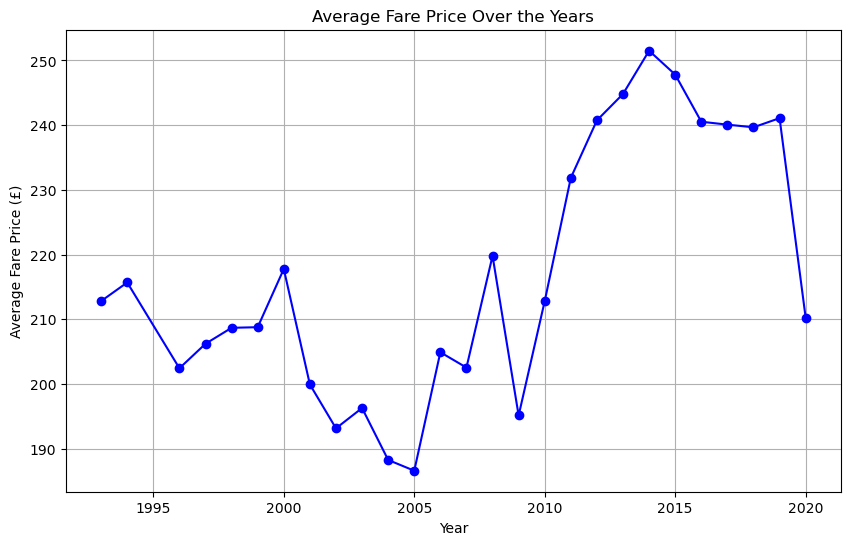

<Figure size 640x480 with 0 Axes>

In [159]:
# Let's plot the average fare prices by year
plt.figure(figsize=(10, 6))
plt.plot(avg_fare_per_year.index, avg_fare_per_year.values, marker='o', linestyle='-', color='b')

# Add title and labels
plt.title('Average Fare Price Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Fare Price (£)')
plt.grid(True)
plt.show()

# Save the plot as a .png file
plt.savefig('../Data/Images/Average_Fare_Price_Over_the_Years.png')

In [160]:

# Let's create "dummy" variables to convert the categorical 'carrier_low' (airline company) into numerical data
df_dummies = pd.get_dummies(df['carrier_low'], drop_first=True)

# Let's combine the 'Year' column with the dummy variables
df_combined = pd.concat([df['Year'], df_dummies], axis=1)

# Let's calculate the correlation
correlation = df_combined.corr()

# Let's print the correlation between 'Year' and each airline company
print(correlation['Year'])



Year    1.000000
5J     -0.010028
9K      0.007520
9N     -0.014523
A7     -0.003062
          ...   
WV     -0.026792
XJ     -0.002761
YY     -0.003963
ZA     -0.004833
ZV     -0.000061
Name: Year, Length: 69, dtype: float64
